In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

!nvidia-smi


Mon Jul 15 15:44:50 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.6/801.6 kB 11.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [4]:
from ultralytics import YOLO
model = YOLO('yolov8m.pt')

100%|██████████| 49.7M/49.7M [00:00<00:00, 76.1MB/s]


In [5]:
model.info()

YOLOv8m summary: 295 layers, 25,902,640 parameters, 0 gradients, 79.3 GFLOPs


(295, 25902640, 0, 79.3204224)

##### **The output of `model.info()` can be broken down as follows:**

- 1. **295 layers**: This indicates that the YOLOv8m model consists of 295 individual layers.<br>
Each layer performs a specific operation on the input data to extract features and make predictions.

- 2. **25,902,640 parameters**: This represents the total number of trainable parameters within the model.
<br>These parameters are adjusted during the training process to optimize the model's performance.

- 3. **0 gradients**: At the time of printing the model summary, there are no gradients calculated.
<br>Gradients are used during training to update the model's parameters and improve its accuracy.

- 4. **79.3 GFLOPs**: This value represents the estimated computational complexity of the model in Giga Floating-Point Operations per Second (GFLOPs).
<br>It provides an indication of the computational resources required to run the model.


## **Ensuring Training, Validating an Testing Images Exists**

In [6]:
import os

train_images_path = "/content/drive/MyDrive/Accident Detection/data/train/images"
val_images_path =  "/content/drive/MyDrive/Accident Detection/data/valid/images"
test_images_path =  "/content/drive/MyDrive/Accident Detection/data/test/images"

if not os.path.exists(train_images_path):
    raise FileNotFoundError(f"Training images not found at {train_images_path}")
if not os.path.exists(test_images_path):
    raise FileNotFoundError(f"Test images not found at {test_images_path}")
if not os.path.exists(val_images_path):
    raise FileNotFoundError(f"Test images not found at {val_images_path}")

print("Training and test image directories verified.")

Training and test image directories verified.


## **Finetuning the model on our custom dataset**

In [7]:

results = model.train(data='/content/drive/MyDrive/Accident Detection/data.yaml', epochs=25, batch=16, imgsz=640)


Ultralytics YOLOv8.2.57 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/Accident Detection/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tr

100%|██████████| 755k/755k [00:00<00:00, 4.04MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 21.1MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Accident Detection/data/train/labels.cache... 947 images, 446 backgrounds, 0 corrupt: 100%|██████████| 947/947 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Accident Detection/data/valid/labels.cache... 154 images, 18 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      7.39G      2.109      3.292      2.224          5        640: 100%|██████████| 60/60 [00:41<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]

                   all        154        170    0.00695      0.276    0.00543     0.0018



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      7.26G      2.162      2.764      2.329          3        640: 100%|██████████| 60/60 [00:27<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.44it/s]

                   all        154        170    0.00116      0.306   0.000764   0.000233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      7.25G      2.238      2.797      2.377          2        640: 100%|██████████| 60/60 [00:28<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.46it/s]

                   all        154        170   0.000726     0.0176   0.000337   3.37e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      7.35G      2.224      2.768      2.386          7        640: 100%|██████████| 60/60 [00:29<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.32it/s]

                   all        154        170      0.331      0.206       0.16     0.0576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      7.35G      2.174      2.519      2.332          4        640: 100%|██████████| 60/60 [00:29<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.43it/s]

                   all        154        170      0.576        0.2      0.183     0.0631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      7.34G      2.125      2.519       2.29          3        640: 100%|██████████| 60/60 [00:29<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.37it/s]

                   all        154        170    0.00641      0.135    0.00459    0.00163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      7.34G      2.045      2.363      2.206          3        640: 100%|██████████| 60/60 [00:29<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.36it/s]

                   all        154        170      0.282      0.218      0.134     0.0483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      7.35G      1.983      2.288      2.173          2        640: 100%|██████████| 60/60 [00:29<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.41it/s]

                   all        154        170      0.276      0.229      0.166     0.0576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      7.34G      2.016       2.15      2.141          1        640: 100%|██████████| 60/60 [00:29<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.41it/s]

                   all        154        170      0.494      0.176      0.203     0.0751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      7.35G      1.947      2.099       2.16          2        640: 100%|██████████| 60/60 [00:29<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.38it/s]

                   all        154        170      0.657      0.365      0.388      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      7.34G       1.86      1.957      2.042          2        640: 100%|██████████| 60/60 [00:29<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.39it/s]

                   all        154        170      0.878      0.297      0.388      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      7.34G      1.904      1.973       2.12          2        640: 100%|██████████| 60/60 [00:29<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.37it/s]

                   all        154        170      0.499      0.271      0.269      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      7.34G       1.79      1.873      2.016          3        640: 100%|██████████| 60/60 [00:29<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.37it/s]

                   all        154        170      0.743      0.289      0.354      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      7.34G      1.763      1.697      1.961          5        640: 100%|██████████| 60/60 [00:29<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.41it/s]

                   all        154        170      0.721      0.312      0.371      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      7.34G      1.763      1.731      1.953          4        640: 100%|██████████| 60/60 [00:29<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.36it/s]

                   all        154        170      0.748      0.315      0.389      0.186


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      7.34G      1.766      1.543      2.136          2        640: 100%|██████████| 60/60 [00:30<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.35it/s]

                   all        154        170      0.567      0.324      0.334      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      7.34G      1.672      1.498      2.062          2        640: 100%|██████████| 60/60 [00:29<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.39it/s]

                   all        154        170      0.793      0.282      0.389      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      7.34G      1.689      1.429      2.082          2        640: 100%|██████████| 60/60 [00:29<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.38it/s]

                   all        154        170      0.789      0.341      0.456      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      7.35G      1.652       1.33      2.069          1        640: 100%|██████████| 60/60 [00:29<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.40it/s]

                   all        154        170      0.715      0.335      0.418      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      7.34G      1.583      1.333       1.99          1        640: 100%|██████████| 60/60 [00:29<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.39it/s]

                   all        154        170      0.577      0.347      0.386      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      7.33G      1.566      1.285      2.005          1        640: 100%|██████████| 60/60 [00:29<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.41it/s]

                   all        154        170      0.716        0.4      0.479      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      7.34G       1.55      1.215      1.966          0        640: 100%|██████████| 60/60 [00:29<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.40it/s]

                   all        154        170      0.816      0.347      0.425      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      7.34G      1.529      1.174      1.952          1        640: 100%|██████████| 60/60 [00:29<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.41it/s]

                   all        154        170      0.676      0.341      0.426      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      7.34G      1.499      1.117      1.937          1        640: 100%|██████████| 60/60 [00:29<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.44it/s]

                   all        154        170      0.844      0.365      0.444      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      7.35G      1.529      1.114      1.932          1        640: 100%|██████████| 60/60 [00:29<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.43it/s]

                   all        154        170      0.682      0.418      0.502       0.23



25 epochs completed in 0.231 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.57 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.69it/s]


                   all        154        170      0.682      0.418      0.502       0.23
Speed: 0.2ms preprocess, 10.2ms inference, 0.0ms loss, 6.4ms postprocess per image
Results saved to runs/detect/train


In [8]:
results

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b428c2bec20>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
# Load the YOLO model with the best.pt checkpoint
model = YOLO('/content/runs/detect/train/weights/best.pt')

In [ ]:
# Evaluate the model on the validation dataset
val_results = model.val()

# Display validation results
print(val_results)

Ultralytics YOLOv8.2.56 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /content/drive/MyDrive/Accident Detection/data/valid/labels.cache... 154 images, 18 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.75it/s]


                   all        154        170      0.673      0.412      0.494      0.229
Speed: 0.2ms preprocess, 21.5ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/detect/val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b26f055ece0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.03303

In [ ]:
# Evaluate the model on the test dataset
test_results = model.val(data='/content/drive/MyDrive/Accident Detection/data.yaml', split='test')

# Display test results
print("Test results:", test_results)

Ultralytics YOLOv8.2.56 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/drive/MyDrive/Accident Detection/data/test/labels.cache... 157 images, 91 backgrounds, 0 corrupt: 100%|██████████| 157/157 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.72it/s]


                   all        157         81      0.732      0.676      0.705      0.327
Speed: 0.3ms preprocess, 25.6ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/val2
Test results: ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b2702347c40>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, Image
import seaborn as sns

In [ ]:
# Function to make predictions
def make_predictions(image_path):
    # Perform inference on the image
    results = model(image_path)

    print(results)

In [ ]:
make_predictions("/content/drive/MyDrive/Accident Detection/data/test/images/ezgif-frame-084_jpg.rf.5baef21b0727b12e875ab4eabec219de.jpg")


image 1/1 /content/drive/MyDrive/Accident Detection/data/test/images/ezgif-frame-084_jpg.rf.5baef21b0727b12e875ab4eabec219de.jpg: 640x640 (no detections), 36.7ms
Speed: 2.2ms preprocess, 36.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'Accident'}
obb: None
orig_img: array([[[252, 253, 251],
        [252, 253, 251],
        [252, 253, 249],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[252, 253, 251],
        [252, 253, 251],
        [252, 253, 249],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[252, 253, 251],
        [252, 253, 251],
        [252, 253, 249],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[ 27,  18,  31],
        [ 26,  17,  30],
   

In [ ]:
make_predictions("/content/drive/MyDrive/Accident Detection/data/test/images/5_17_jpg.rf.0611b10e50517e4323c47fc36301167c.jpg")


image 1/1 /content/drive/MyDrive/Accident Detection/data/test/images/5_17_jpg.rf.0611b10e50517e4323c47fc36301167c.jpg: 640x640 (no detections), 36.4ms
Speed: 1.7ms preprocess, 36.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'Accident'}
obb: None
orig_img: array([[[19, 17, 17],
        [13, 11, 11],
        [15, 13, 13],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 2,  2,  2]],

       [[13, 11, 11],
        [ 7,  5,  5],
        [ 5,  3,  3],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 5,  3,  3],
        [ 2,  0,  0],
        [ 2,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[ 0,  3,  0],
        [ 0,  5,  2],
        [ 0,  3,  1],
        ...,
        [ 2,  0,  1],
        [ 4,  0, 

In [ ]:

!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt source="/content/drive/MyDrive/Accident Detection/data/testing1.jpg"

Ultralytics YOLOv8.2.56 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/Accident Detection/data/testing1.jpg: 640x640 (no detections), 36.2ms
Speed: 2.3ms preprocess, 36.2ms inference, 36.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:

!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt source="/content/drive/MyDrive/Accident Detection/data/testing1.jpg" -thresh 0.01 | grep "ACCIDENT" && echo "Accident is present" || echo "No accident detected"

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 638, in entrypoint
    check_dict_alignment(full_args_dict, {a: ""})
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 399, in check_dict_alignment
    raise SyntaxError(string + CLI_HELP_MSG) from e
SyntaxError: '-thresh' is not a valid YOLO argument. 

    Arguments received: ['yolo', 'task=detect', 'mode=predict', 'model=runs/detect/train/weights/best.pt', 'source=/content/drive/MyDrive/Accident Detection/data/testing1.jpg', '-thresh', '0.01']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'obb', 'classify', 'segment', 'pose', 'detect'}
                MODE (required) is one of {'train', 'track', 'val', 'benchmark', 'export', 'predict'}
                ARGS (optional) are any num

In [ ]:
make_predictions("/content/drive/MyDrive/Accident Detection/data/testing1.jpg")


image 1/1 /content/drive/MyDrive/Accident Detection/data/testing1.jpg: 640x640 (no detections), 36.6ms
Speed: 2.6ms preprocess, 36.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'Accident'}
obb: None
orig_img: array([[[ 32,  69,  53],
        [ 16,  43,  34],
        [ 34,  36,  47],
        ...,
        [ 98,  97, 123],
        [ 91,  90, 116],
        [ 39,  38,  64]],

       [[  0,  30,  13],
        [  1,  25,  13],
        [ 29,  30,  34],
        ...,
        [ 98,  97, 123],
        [ 79,  78, 104],
        [ 41,  40,  66]],

       [[  0,  12,   0],
        [  0,  14,   0],
        [ 21,  20,  10],
        ...,
        [109, 108, 134],
        [ 70,  69,  95],
        [ 45,  44,  70]],

       ...,

       [[ 77,  72,  73],
        [ 79,  74,  75],
        [ 46,  44,  44],
        ...,
        [142, 125, 116],

In [ ]:
def make_inference(path="/content/drive/MyDrive/Accident Detection/data/test/images/5_17_jpg.rf.0611b10e50517e4323c47fc36301167c.jpg"):
    results = model(path)
    for result in results:
        result.show()
    # Run inference on a new image
    inference_results = model()

    # Display the inference results
    for result in results:
        result.show()

In [ ]:

# Load the video
video_path = "/content/drive/MyDrive/Accident Detection/data/testing.mp4"

# Perform inference on the video
results = model(video_path)

# Display the results
for result in results:
    result.show()




WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/356) /content/drive/MyDrive/Accident Detection/data/testing.mp4: 384x640 (no detections), 24.7ms
video 1/1 (frame 2/356) /content/drive/MyDrive/Accident Detection/data/testing.mp4: 384x640 (no detections), 24.6ms
video 1/1 (frame 3/356) /content/drive/MyDrive/Accident Detection/data/testing.mp4: 384x640 (no detections), 24.6ms
video 1/1 (frame 4/356) /content/drive/MyDrive/Accident Detection/data/testing.mp4: 384x640 (no detections),

In [ ]:
import cv2

# Load the model
model = YOLO('/content/runs/detect/train/weights/best.pt')

def make_video_inference(video_path, output_path):
    """
    Performs inference on a video and saves the output with bounding boxes and labels.

    Args:
        video_path: Path to the input video.
        output_path: Path to save the output video.
    """
    # Open the video
    cap = cv2.VideoCapture(video_path)

    # Get the video dimensions
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Define the output video writer
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, cap.get(cv2.CAP_PROP_FPS), (width, height))

    # Loop over the frames of the video
    while cap.isOpened():
        # Read the next frame
        ret, frame = cap.read()

        # If the frame is empty, break
        if not ret:
            break

        # Perform inference on the frame
        results = model(frame)

        # Draw the bounding boxes on the frame
        for result in results:
            for box in result.boxes:
                x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get the coordinates
                confidence = box.conf.item()  # Get the confidence
                class_id = int(box.cls.item())  # Get the class id

                # Draw the bounding box
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

                # Put text if accident is detected
                if class_id == 0:  # Assuming class_id 0 corresponds to 'Accident'
                    cv2.putText(frame, f'Accident: {confidence:.2f}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
                    cv2.putText(frame, 'Accident', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

        # Write the frame to the output video
        out.write(frame)

    # Release the video capture and writer
    cap.release()
    out.release()

# Call the function with the video and output paths
make_video_inference(video_path="/content/drive/MyDrive/Accident Detection/data/testing2.mp4", output_path="/content/drive/MyDrive/Accident Detection/output2.mp4")



0: 384x640 (no detections), 25.2ms
Speed: 1.7ms preprocess, 25.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 24.5ms
Speed: 2.3ms preprocess, 24.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 24.5ms
Speed: 1.6ms preprocess, 24.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 24.5ms
Speed: 1.6ms preprocess, 24.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 16.5ms
Speed: 1.9ms preprocess, 16.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 16.5ms
Speed: 1.6ms preprocess, 16.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 16.5ms
Speed: 1.6ms preprocess, 16.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 16.1ms
Speed: 1.5ms preprocess, 16.1ms i

### **Learning Curve Analysis**

In [14]:
!pwd

/content


In [29]:
# Define the path to the directory
post_training_files_path = '/content/drive/MyDrive/Accident Detection/runs/detect/train'

# List the files in the directory
!ls {post_training_files_path}

ls: cannot access '/content/drive/MyDrive/Accident': No such file or directory
ls: cannot access 'Detection/runs/detect/train': No such file or directory


In [9]:
# Define a function to plot learning curves for loss values
def plot_learning_curve(df, train_loss_col, val_loss_col, title):
    plt.figure(figsize=(12, 5))
    sns.lineplot(data=df, x='epoch', y=train_loss_col, label='Train Loss', color='#141140', linestyle='-', linewidth=2)
    sns.lineplot(data=df, x='epoch', y=val_loss_col, label='Validation Loss', color='orangered', linestyle='--', linewidth=2)
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

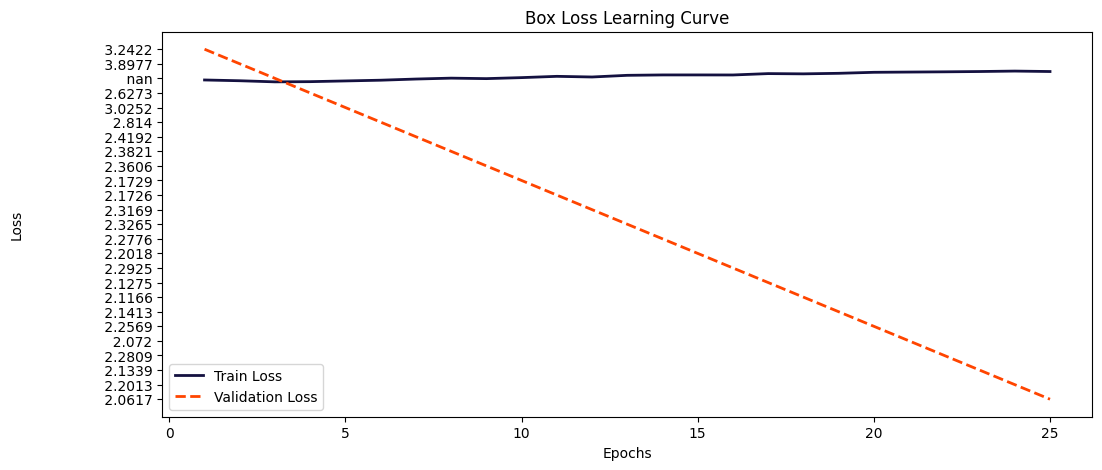

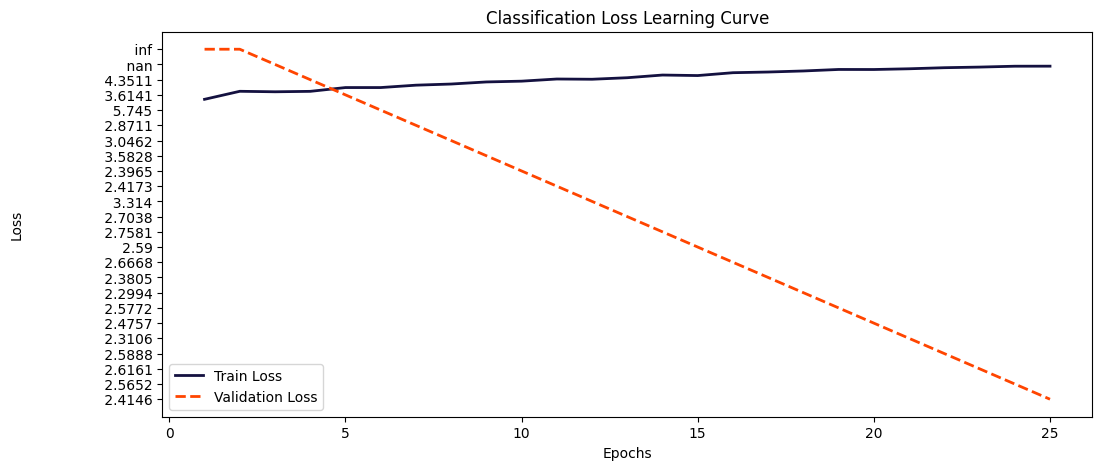

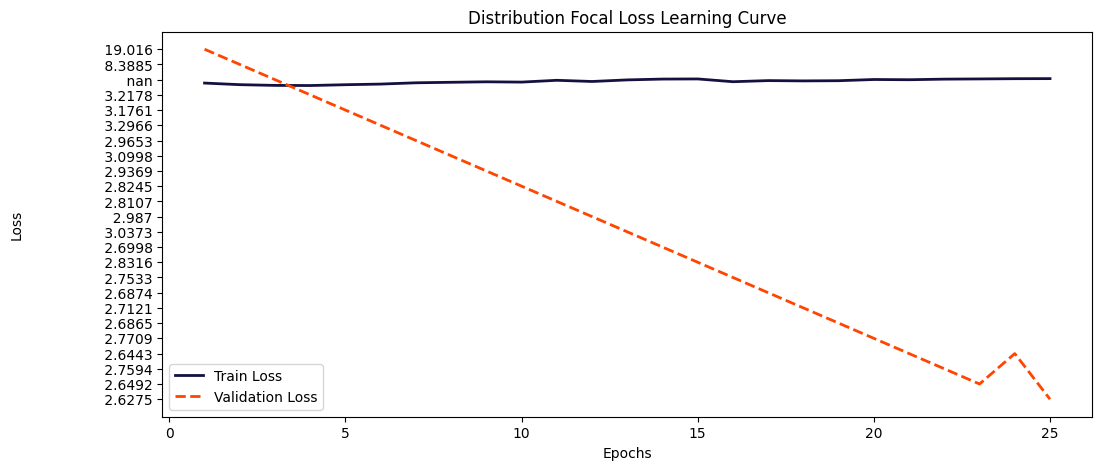

In [30]:
# Create the full file path for 'results.csv' using the directory path and file name
results_csv_path = os.path.join('/content/drive/MyDrive/Accident Detection/runs/detect/train', 'results.csv')

# Load the CSV file from the constructed path into a pandas DataFrame
df = pd.read_csv(results_csv_path)

# Remove any leading whitespace from the column names
df.columns = df.columns.str.strip()

# Plot the learning curves for each loss
plot_learning_curve(df, 'train/box_loss', 'val/box_loss', 'Box Loss Learning Curve')
plot_learning_curve(df, 'train/cls_loss', 'val/cls_loss', 'Classification Loss Learning Curve')
plot_learning_curve(df, 'train/dfl_loss', 'val/dfl_loss', 'Distribution Focal Loss Learning Curve')

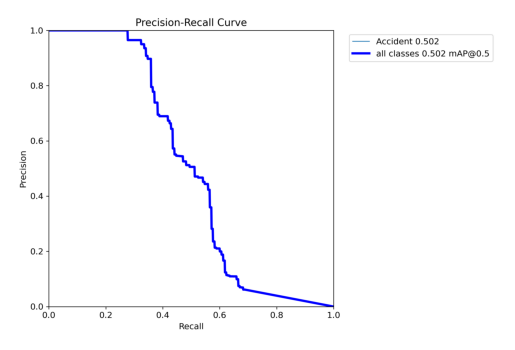

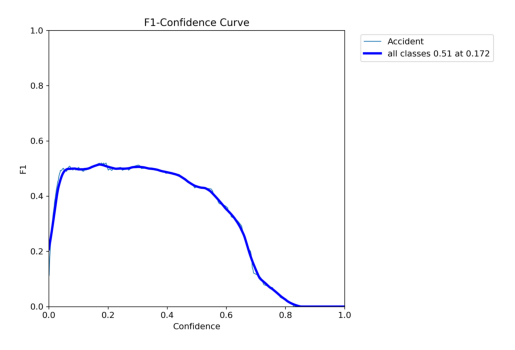

In [32]:
# !pip install Pillow
from PIL import Image

# Path to the directory containing performance images
performance_images_path = "/content/drive/MyDrive/Accident Detection/runs/detect/train/"

# List all files in the directory
image_files = os.listdir(performance_images_path)

# Filter for images with relevant metrics
relevant_metrics = ["F1","PR"]
metric_images = [f for f in image_files if any(metric in f for metric in relevant_metrics)]

# Display each image
for image_file in metric_images:
    image_path = os.path.join(performance_images_path, image_file)
    # Use Image.open from PIL to open the image
    image = Image.open(image_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [19]:
import locale
print(locale.getpreferredencoding())

UTF-8


In [21]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

# **Thank You**